## Interpolacja 

W poniższych zadaniach wykorzystać funkcje z ćwiczenia poprzedniego. Proszę także użyć tych samych zbiorów punktów. 

#### Zadanie 1: Interpolacja metodą Newtona 
Napisać własną implementację interpolacji wielomianowej  Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie. Oszacować dokładność (błąd interpolacji). 

In [1]:
import math as m
import numpy as np
from sympy.polys.domains import domain
from tabulate import tabulate
import matplotlib.pyplot as plt
import sympy as sp

def get_table(min, max, number_of_points, func, func_name):
    step = (max - min) / number_of_points
    table = []
    x_values = []
    y_values = []
    for i in np.arange(min, max+step, step):
        table.append([i, func(i)])
        x_values.append(i)
        y_values.append(func(i))
    # print(tabulate(table, headers=["x", func_name], tablefmt="grid", floatfmt=".10f"))
    return x_values, y_values, tabulate(table, headers=["x", func_name], tablefmt="grid",
                                        floatfmt=".10f")
def draw_diagram(min, max, num_of_point, func1, func2, func_name, newton_polynomial):
    x_array = []
    func1_array = []
    func2_array = []
    step = (max - min) / num_of_point
    for i in np.arange(min, max+step, step):
        x_array.append(i)
        func1_array.append(func1(newton_polynomial, i))
        func2_array.append(func2(i))

    plt.plot(x_array, func1_array, label="Interpolation "+func_name)
    plt.plot(x_array, func2_array, label=func_name)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title(func_name)
    plt.legend()
    plt.show()

def compare(min, max, number_of_points, fun1, poly_calc, polynomial, fun_name, rel_errors, abs_errors):
    table = []
    step = (max - min) / number_of_points
    for x in np.arange(min + (step / 2), max + (step / 2), step):
        table.append([x, fun1(x), poly_calc(polynomial, x),
                      abs(poly_calc(polynomial, x) - fun1(x)) / fun1(x),
                      abs(poly_calc(polynomial, x) - fun1(x))])
        rel_errors.append(abs(poly_calc(polynomial, x) - fun1(x)) / fun1(x))
        abs_errors.append(abs(poly_calc(polynomial, x) - fun1(x)))
    print(tabulate(table, headers=["x", fun_name, "Interpolation of " + fun_name, "Relative error", "Absolute error"],
                   tablefmt="grid", floatfmt=".10f"))



def get_value(f, x):
    X = sp.symbols("x")
    return f.evalf(subs={X: x})


def get_coefficients(x_array, y_array):
    n = len(x_array)
    a = np.copy(y_array)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = float(a[i] - a[i-1]) / float(x_array[i] - x_array[i-j])
    return np.array(a)


def get_newton_polynomial(coeffs, x):
    X = sp.symbols("x")
    n = len(coeffs)
    res = 0
    for i in range(n):
        part = 1
        for j in range(i):
            part *= (X - x[j])
        res += part * coeffs[i]
    return sp.simplify(res)


def comparison0(min, max, n, relative_er, abs_er):
    x_sqrt, y_sqrt, sqrt_tab1 = get_table(min, max, n, m.sqrt, "sqrt(x)")
    x_sin, y_sin, sin_tab1 = get_table(min, max, n, m.sin, "sin(x)")
    f = lambda x: x ** 3 + 2 * x
    x_f, y_f, f_tab1 = get_table(min, max, n, f, "x^3 + 2x")
        
    sqrt_coeffs = get_coefficients(x_sqrt, y_sqrt)
    sin_coefs = get_coefficients(x_sin, y_sin)
    f_coefs = get_coefficients(x_f, y_f)
    
    sqrt_approx = get_newton_polynomial(sqrt_coeffs, x_sqrt)
    sin_approx = get_newton_polynomial(sin_coefs, x_sin)
    f_approx = get_newton_polynomial(f_coefs, x_f)

    print(sqrt_tab1)
    compare(min, max, n, m.sqrt, get_value, sqrt_approx, "sqrt(x)", relative_er, abs_er)


    print(sin_tab1)
    compare(min, max, n, m.sin, get_value, sin_approx, "sin(x)", relative_er, abs_er)


    print(f_tab1)
    compare(min, max, n, f, get_value, f_approx, "x^3 + 2x", relative_er, abs_er)
    
    draw_diagram(min, max, 10000, get_value, np.math.sqrt, "sqrt", get_newton_polynomial(sqrt_coeffs, x_sqrt))
    draw_diagram(min, max, 10000, get_value, np.math.sin, "sin", get_newton_polynomial(sin_coefs, x_sin))
    draw_diagram(min, max, 10000, get_value, f, "f", get_newton_polynomial(f_coefs, x_f))

In [2]:
newton_rel_errors = []
newton_abs_errors = []

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 2.5000000000 | 1.5811388301 |               1.2817662756 |     0.1893398282 |     0.2993725545 |
+--------------+--------------+----------------------------+------------------+------------------+
| 7.5000000000 | 2.7386127875 |               2.8629051057 |     0.0453851376 |     0.1242923182 |
+--------------+--------------+----------------------------+------------------+------------------+
+---------

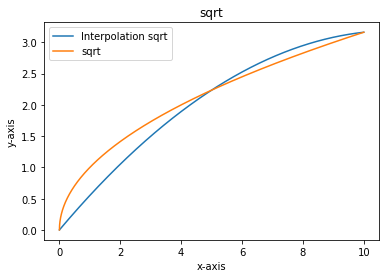

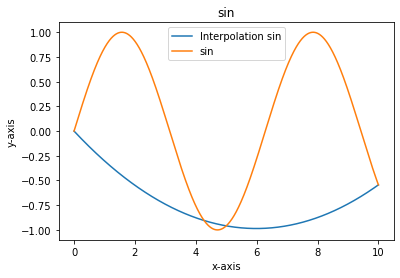

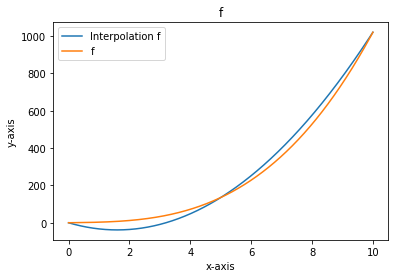

In [3]:
comparison0(0, 10, 2, newton_rel_errors, newton_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  3.3333333333 | 1.8257418584 |
+---------------+--------------+
|  6.6666666667 | 2.5819888975 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 1.6666666667 | 1.2909944487 |               1.1024038155 |     0.1460816764 |     0.1885906332 |
+--------------+--------------+----------------------------+------------------+------------------+
| 5.0000000000 | 2.2360679775 |               2.2817061964 |     0.0204100320 |     0.0456382189 |
+--------------+--------------+------------

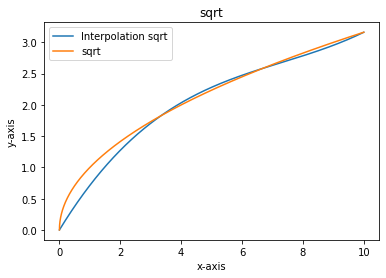

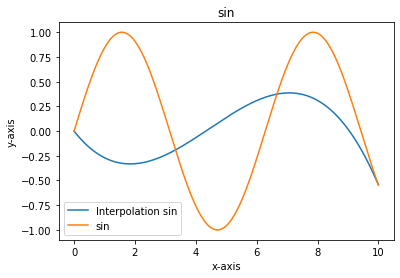

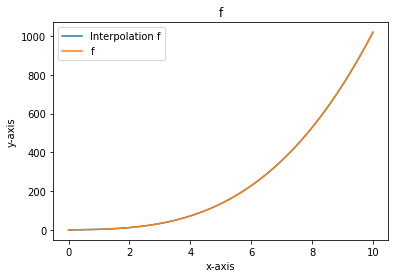

In [4]:
comparison0(0, 10, 3, newton_rel_errors, newton_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  2.5000000000 | 1.5811388301 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
|  7.5000000000 | 2.7386127875 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 1.2500000000 | 1.1180339887 |               0.9820659964 |     0.1216134695 |     0.1359679924 |
+--------------+--------------+----------------------------+------------------+------------------+
| 3.7500000000 | 1.9364916731 |               1.9596017579 |     0.011933996

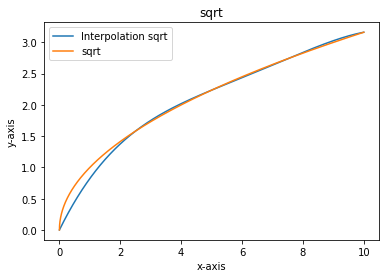

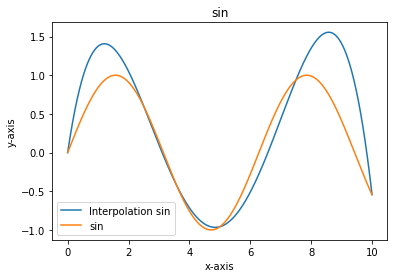

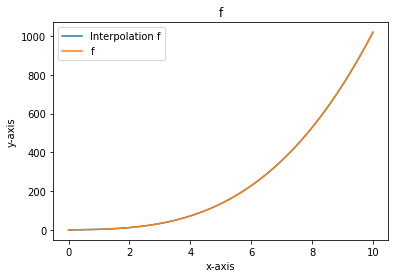

In [5]:
comparison0(0, 10, 4, newton_rel_errors, newton_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  1.4285714286 | 1.1952286093 |
+---------------+--------------+
|  2.8571428571 | 1.6903085095 |
+---------------+--------------+
|  4.2857142857 | 2.0701966780 |
+---------------+--------------+
|  5.7142857143 | 2.3904572187 |
+---------------+--------------+
|  7.1428571429 | 2.6726124191 |
+---------------+--------------+
|  8.5714285714 | 2.9277002188 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 0.7142857143 | 0.8451542547 |               0.7729116136 |     0.085478645

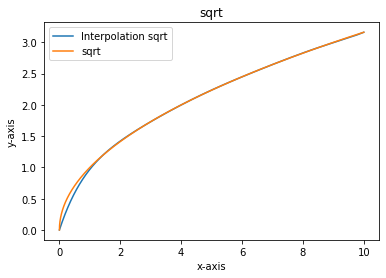

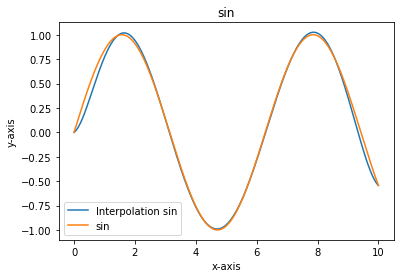

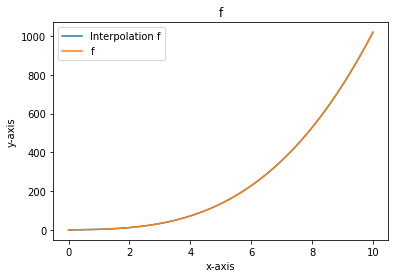

In [6]:
comparison0(0, 10, 7, newton_rel_errors, newton_abs_errors)




#### Zadanie 2: Interpolacj metodą Hermite'a 
Napisać odpowiedni algorytm dla interpolacji Hermite'a. Wizualiacja wyników podobnie jak poprzednio. Oszacować dokładność (błąd interpolacji). 

In [7]:
def get_hermite_polynomial(x, y):
  if len(x) != len(y):
    return None
  n = len(x)
  multiplicity = [0] * n

  for i in range(1, n):
    if x[i] == x[i - 1]:
      multiplicity[i] = multiplicity[i - 1] + 1
    else:
      multiplicity[i] = 0

  for i in range(1, n):
    for j in range(n - 1, i - 1, -1):
      if multiplicity[j] == 0:
        y[j] = (y[j] - y[j - 1 - multiplicity[j - 1]]) / (x[j] - x[j - i])
      else:
        y[j] /= i
        multiplicity[j] -= 1

  X = sp.symbols('x')
  polynomial = 0
  for i in range(n):
      value = y[i]
      for j in range(i):
          value *= (X - x[j])
      polynomial += value

  return sp.simplify(polynomial)


def comparison1(min, max, n, relative_er, abs_er):
    x_sqrt, y_sqrt, sqrt_tab1 = get_table(min, max, n, m.sqrt, "sqrt(x)")
    x_sin, y_sin, sin_tab1 = get_table(min, max, n, m.sin, "sin(x)")
    f = lambda x: x ** 3 + 2 * x
    x_f, y_f, f_tab1 = get_table(min, max, n, f, "x^3 + 2x")
        
    sqrt_coeffs = get_coefficients(x_sqrt, y_sqrt)
    sin_coefs = get_coefficients(x_sin, y_sin)
    f_coefs = get_coefficients(x_f, y_f)
    
    sqrt_approx = get_hermite_polynomial(sqrt_coeffs, x_sqrt)
    sin_approx = get_hermite_polynomial(sin_coefs, x_sin)
    f_approx = get_hermite_polynomial(f_coefs, x_f)

    print(sqrt_tab1)
    compare(min, max, n, m.sqrt, get_value, sqrt_approx, "sqrt(x)", relative_er, abs_er)


    print(sin_tab1)
    compare(min, max, n, m.sin, get_value, sin_approx, "sin(x)", relative_er, abs_er)


    print(f_tab1)
    compare(min, max, n, f, get_value, f_approx, "x^3 + 2x", relative_er, abs_er)
    
    draw_diagram(min, max, 10000, get_value, np.math.sqrt, "sqrt", get_newton_polynomial(sqrt_coeffs, x_sqrt))
    draw_diagram(min, max, 10000, get_value, np.math.sin, "sin", get_newton_polynomial(sin_coefs, x_sin))
    draw_diagram(min, max, 10000, get_value, f, "f", get_newton_polynomial(f_coefs, x_f))

In [8]:
hermite_rel_errors = []
hermite_abs_errors = []

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------+------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |   Relative error |   Absolute error |
+==============+==============+============================+==================+==================+
| 2.5000000000 | 1.5811388301 |            4287.1583882037 |  2710.4370393240 |  4285.5772493736 |
+--------------+--------------+----------------------------+------------------+------------------+
| 7.5000000000 | 2.7386127875 |           43984.1058178641 | 16059.7246187589 | 43981.3672050766 |
+--------------+--------------+----------------------------+------------------+------------------+
+---------

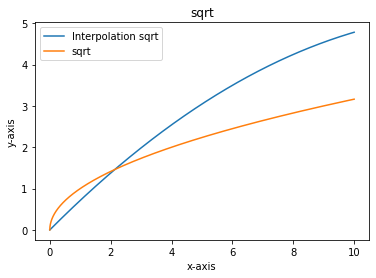

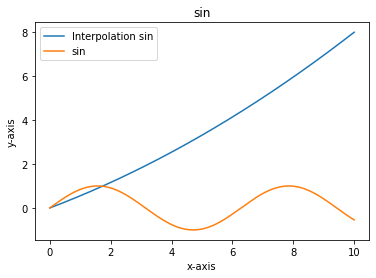

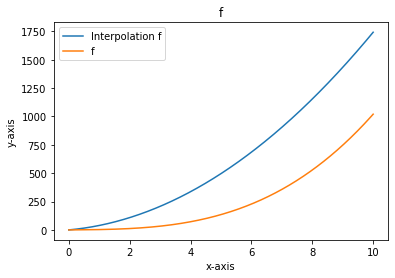

In [9]:
comparison1(0, 10, 2, hermite_rel_errors, hermite_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  3.3333333333 | 1.8257418584 |
+---------------+--------------+
|  6.6666666667 | 2.5819888975 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+---------------------+---------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |      Relative error |      Absolute error |
+==============+==============+============================+=====================+=====================+
| 1.6666666667 | 1.2909944487 |         -294241.0859007261 |   227919.1650926996 |   294242.3768951748 |
+--------------+--------------+----------------------------+---------------------+---------------------+
| 5.0000000000 | 2.2360679775 |       -10350737.8537600078 |  4628991.6916575301 | 10350740.0898279846 |
+------

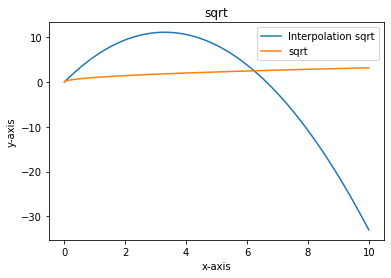

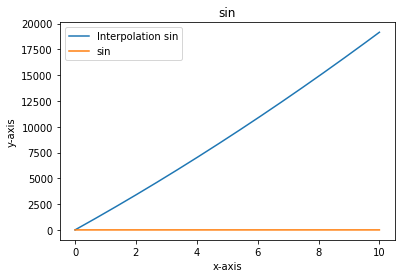

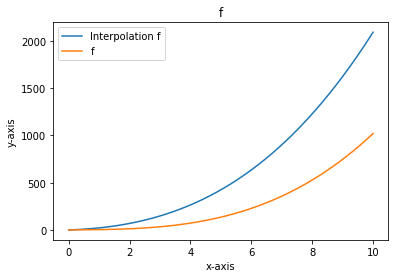

In [10]:
comparison1(0, 10, 3, hermite_rel_errors, hermite_abs_errors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  2.5000000000 | 1.5811388301 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
|  7.5000000000 | 2.7386127875 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+----------------------------+------------------------+-------------------------+
|            x |      sqrt(x) |   Interpolation of sqrt(x) |         Relative error |          Absolute error |
+==============+==============+============================+========================+=========================+
| 1.2500000000 | 1.1180339887 |       -43132662.2130523771 |    38579026.9035686553 |     43132663.3310863674 |
+--------------+--------------+----------------------------+------------------------+-------------------------+
| 3.7500000

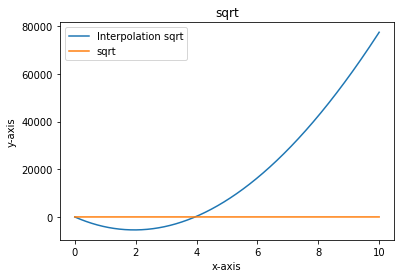

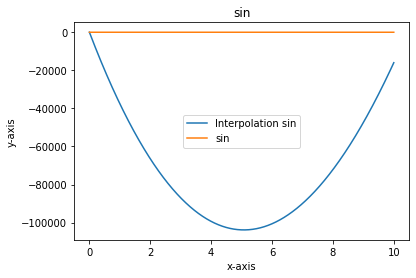

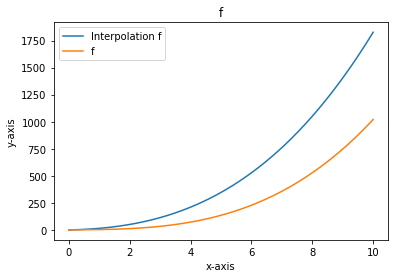

In [11]:
comparison1(0, 10, 4, hermite_rel_errors, hermite_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  1.4285714286 | 1.1952286093 |
+---------------+--------------+
|  2.8571428571 | 1.6903085095 |
+---------------+--------------+
|  4.2857142857 | 2.0701966780 |
+---------------+--------------+
|  5.7142857143 | 2.3904572187 |
+---------------+--------------+
|  7.1428571429 | 2.6726124191 |
+---------------+--------------+
|  8.5714285714 | 2.9277002188 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+---------------------------------------+--------------------------------------+--------------------------------------+
|            x |      sqrt(x) |              Interpolation of sqrt(x) |                       Relative error |                       Absolute error |
+==============+==============+=======================================+==

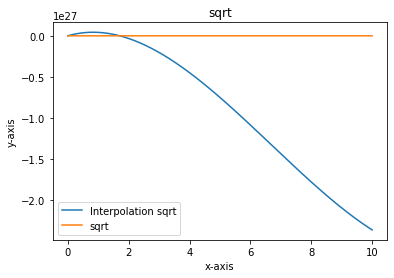

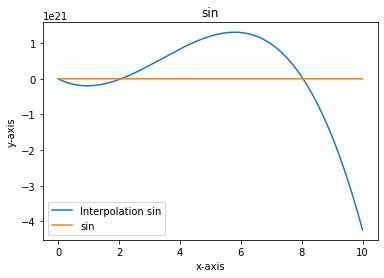

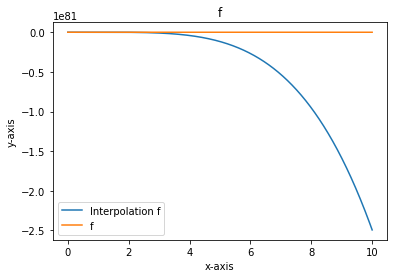

In [12]:
comparison1(0, 10, 7, hermite_rel_errors, hermite_abs_errors)


#### Zadanie 3: Wyjaśnić i zademonstrować efekt Rungego

Efekt Rungego – pogorszenie jakości interpolacji wielomianowej, mimo zwiększenia liczby jej węzłów. 
    Początkowo ze wzrostem liczby węzłów n przybliżenie poprawia się, jednak po dalszym wzroście n, zaczyna się pogarszać, co jest szczególnie widoczne na końcach przedziałów.
    Takie zachowanie wielomianu interpolującego jest zjawiskiem typowym dla interpolacji za pomocą wielomianów wysokich stopni przy stałych odległościach węzłów. 
    Występuje również, jeśli interpolowana funkcja jest nieciągła albo odbiega znacząco od funkcji gładkiej.

Ponieważ zgodnie z twierdzeniem Weierstrassa istnieje ciąg interpolujących wielomianów coraz wyższych stopni, które przybliżają jednostajnie funkcje ciągłą, można uważać to za paradoks, iż efekt Rungego ma dokładnie odwrotny wynik. Jest to spowodowane nałożeniem warunku na równoodległość węzłów.

Aby uniknąć tego efektu, stosuje się interpolację z węzłami coraz gęściej upakowanymi na krańcach przedziału interpolacji. Np. węzłami interpolacji n-punktowej wielomianowej powinny być miejsca zerowe wielomianu Czebyszewa n-tego stopnia.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  0.2000000000 | 0.4472135955 |
+---------------+--------------+
|  0.4000000000 | 0.6324555320 |
+---------------+--------------+
|  0.6000000000 | 0.7745966692 |
+---------------+--------------+
|  0.8000000000 | 0.8944271910 |
+---------------+--------------+
|  1.0000000000 | 1.0000000000 |
+---------------+--------------+
|  1.2000000000 | 1.0954451150 |
+---------------+--------------+
|  1.4000000000 | 1.1832159566 |
+---------------+--------------+
|  1.6000000000 | 1.2649110641 |
+---------------+--------------+
|  1.8000000000 | 1.3416407865 |
+---------------+--------------+
|  2.0000000000 | 1.4142135624 |
+---------------+--------------+
|  2.2000000000 | 1.4832396974 |
+---------------+--------------+
|  2.4000000000 | 1.5491933385 |
+---------------+--------------+
|  2.6000000000 | 1.6124515497 |
+---------

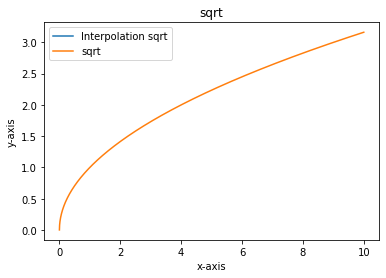

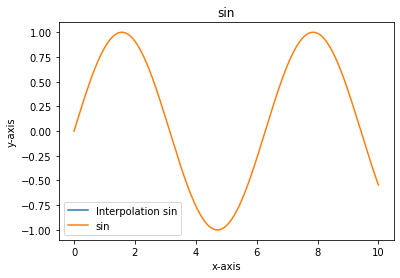

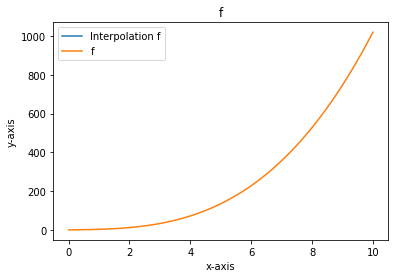

In [13]:
comparison1(0, 10, 50, [], [])



#### Zadanie 4: Interpolacja funkcjami sklejanymi 
Wykorzystując bibliotekę SciPy lub NumPy wykonać interpolację danych przy pomocy B-splinów. Oszacować dokładność (błąd interpolacji). 

In [14]:
import scipy.interpolate as interpolate

def draw_diagram1(min, max, number_of_points, fun1, fun2, fun_name):
    x_axis = np.linspace(min, max, number_of_points)
    f1_values = fun1(x_axis)
    f2_values = fun2(x_axis)

    plt.plot(x_axis, f1_values, label=fun_name)
    plt.plot(x_axis, f2_values, label="B-spline " + fun_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Comparison of " + fun_name + " and its interpolation")
    plt.legend()
    plt.show()


def compare1(min, max, number_of_points, fun1, fun2, fun_name, rel_errors, abs_errors):
    table = []
    step = (max - min) / number_of_points
    for x in np.arange(min + (step / 2), max + (step / 2), step):
        table.append([x, fun1(x), fun2(x),
                      abs(fun2(x) - fun1(x)) / fun1(x),
                      abs(fun2(x) - fun1(x))])
        rel_errors.append(abs(fun2(x) - fun1(x)) / fun1(x))
        abs_errors.append(abs(fun2(x) - fun1(x)))
    print(tabulate(table, headers=["x", fun_name, "B-spline", "Relative error", "Absolute error"],
                   tablefmt="grid", floatfmt=".10f"))


def calculate_bspline(x_array, y_array):
    t, c, k = interpolate.splrep(x_array, y_array, s=0, k=2)
    return interpolate.BSpline(t, c, k, extrapolate=False)


def comparison2(min, max, n, rel_errors, abs_errors):
    sqrt_x_arr, sqrt_y_arr, sqrt_x_y = get_table(min, max, n, m.sqrt, "sqrt(x)")
    sin_x_arr, sin_y_arr, sin_x_y = get_table(min, max, n, m.sin, "sin(x)")
    f = lambda x: x**3 + 2*x
    f_x_arr, f_y_arr, f_x_y = get_table(min, max, n, f, "x^3 + 2x")
    
    
    sqrt_approx = calculate_bspline(sqrt_x_arr, sqrt_y_arr)
    sin_approx = calculate_bspline(sin_x_arr, sin_y_arr)
    f_approx = calculate_bspline(f_x_arr, f_y_arr)

    
    print(sqrt_x_y)
    compare1(min, max, n, np.sqrt, sqrt_approx, "sqrt(x)", rel_errors, abs_errors)

    print(sin_x_y)
    compare1(min, max, n, np.sin, sin_approx, "sin(x)", rel_errors, abs_errors)

    print(f_x_y)
    compare1(min, max, n, f, f_approx, "x^3 + 2x", rel_errors, abs_errors)
    
    draw_diagram1(min, max, 1000, np.sqrt, sqrt_approx, "sqrt(x)")
    draw_diagram1(min, max, 1000, np.sin, sin_approx, "sin(x)")
    draw_diagram1(min, max, 1000, f, f_approx, "x^3 + 2x")
   

In [15]:
bspline_rel_errors = []
bspline_abs_errors = []

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+--------------+------------------+------------------+
|            x |      sqrt(x) |     B-spline |   Relative error |   Absolute error |
+==============+==============+==============+==================+==================+
| 2.5000000000 | 1.5811388301 | 1.2817662756 |     0.1893398282 |     0.2993725545 |
+--------------+--------------+--------------+------------------+------------------+
| 7.5000000000 | 2.7386127875 | 2.8629051057 |     0.0453851376 |     0.1242923182 |
+--------------+--------------+--------------+------------------+------------------+
+---------------+---------------+
|             x |        sin(x) |
+===============+===============+
|  0.0

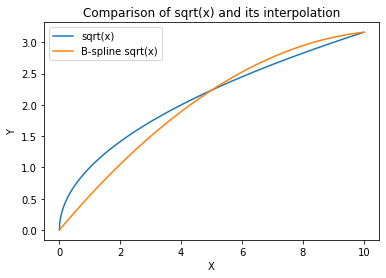

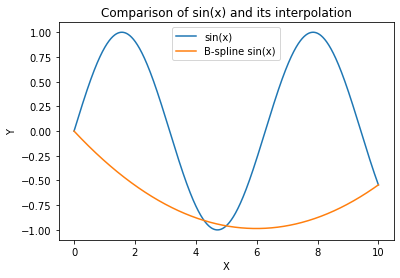

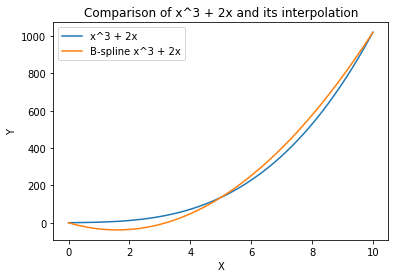

In [16]:
comparison2(0, 10, 2, bspline_rel_errors, bspline_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  3.3333333333 | 1.8257418584 |
+---------------+--------------+
|  6.6666666667 | 2.5819888975 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+--------------+------------------+------------------+
|            x |      sqrt(x) |     B-spline |   Relative error |   Absolute error |
+==============+==============+==============+==================+==================+
| 1.6666666667 | 1.2909944487 | 1.0651731262 |     0.1749204443 |     0.2258213225 |
+--------------+--------------+--------------+------------------+------------------+
| 5.0000000000 | 2.2360679775 | 2.2817061964 |     0.0204100320 |     0.0456382189 |
+--------------+--------------+--------------+------------------+------------------+
| 8.3333333333 | 2.8867513459 | 2.87551271

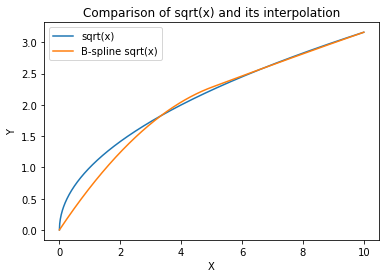

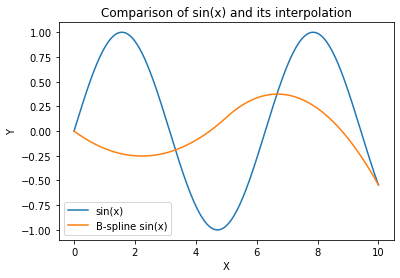

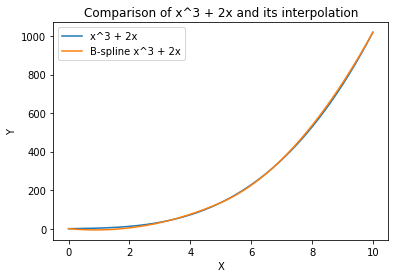

In [17]:
comparison2(0, 10, 3, bspline_rel_errors, bspline_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  2.5000000000 | 1.5811388301 |
+---------------+--------------+
|  5.0000000000 | 2.2360679775 |
+---------------+--------------+
|  7.5000000000 | 2.7386127875 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+--------------+------------------+------------------+
|            x |      sqrt(x) |     B-spline |   Relative error |   Absolute error |
+==============+==============+==============+==================+==================+
| 1.2500000000 | 1.1180339887 | 0.9226650813 |     0.1747432631 |     0.1953689074 |
+--------------+--------------+--------------+------------------+------------------+
| 3.7500000000 | 1.9364916731 | 1.9754212462 |     0.0201031451 |     0.0389295731 |
+--------------+--------------+--------------+---------------

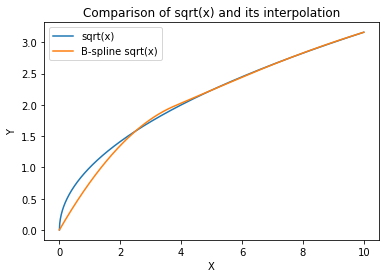

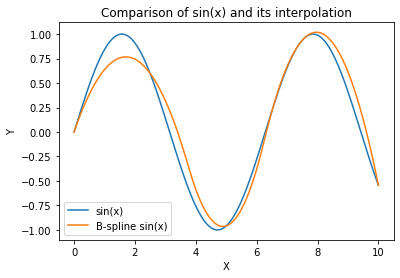

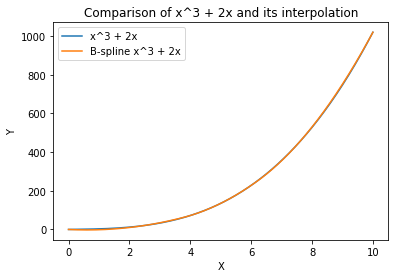

In [18]:
comparison2(0, 10, 4, bspline_rel_errors, bspline_abs_errors)

+---------------+--------------+
|             x |      sqrt(x) |
+===============+==============+
|  0.0000000000 | 0.0000000000 |
+---------------+--------------+
|  1.4285714286 | 1.1952286093 |
+---------------+--------------+
|  2.8571428571 | 1.6903085095 |
+---------------+--------------+
|  4.2857142857 | 2.0701966780 |
+---------------+--------------+
|  5.7142857143 | 2.3904572187 |
+---------------+--------------+
|  7.1428571429 | 2.6726124191 |
+---------------+--------------+
|  8.5714285714 | 2.9277002188 |
+---------------+--------------+
| 10.0000000000 | 3.1622776602 |
+---------------+--------------+
+--------------+--------------+--------------+------------------+------------------+
|            x |      sqrt(x) |     B-spline |   Relative error |   Absolute error |
+==============+==============+==============+==================+==================+
| 0.7142857143 | 0.8451542547 | 0.6974862912 |     0.1747230907 |     0.1476679635 |
+--------------+--------------+--

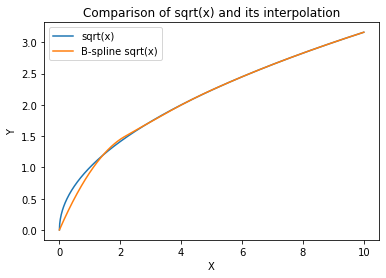

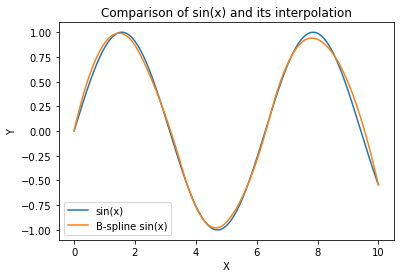

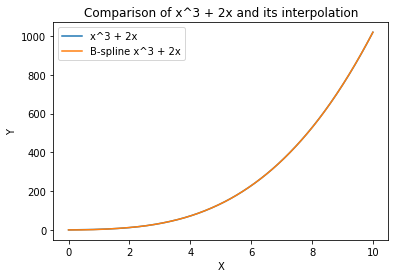

In [19]:
comparison2(0, 10, 7, bspline_rel_errors, bspline_abs_errors)